In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

In [130]:
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (10, 6)
style.use('seaborn-whitegrid')

# Task 1

In [3]:
def sir(x, beta, gamma, n):
    """
    Single run of SIR model.
    Args:
        x - s, i, r values vector,
        beta - infection rate,
        gamma - recovery rate,
        n - population size.
    """
    s, i , r = x
    ds = -beta*s*i / n
    di = beta*s*i / n - gamma*i
    dr = gamma*i
    return np.array([ds, di, dr])

In [4]:
def euler(x0, beta, gamma, n, steps):
    """
    Euler method for SIR model.
    Args:
        x0 - initial conditions vector,
        beta - infection rate,
        gamma - recovery rate,
        n - population size,
        steps - number of values to compute.
    """
    assert len(x0) == 3
    
    x = np.zeros([steps, 3])
    x[0] = x0

    for i in range(1, steps):
        x[i] = x[i-1] + sir(x[i-1], beta, gamma, n)

    x_df = pd.DataFrame(x)
    x_df.columns = ['S', 'I', 'R']
    
    return x_df

In [17]:
def plot_sir(data, beta, gamma, n):
    data.plot(title=fr'SIR for $\beta={beta}$, $\gamma={gamma}$, $n={n}$, $R_0={beta/gamma}$')

In [97]:
N = 10000
X0 = [N-1, 1, 0]

### $R_0 = \frac{\beta}{\gamma} > 1$

In [21]:
beta1 = 0.4
gamma1 = 0.1

In [22]:
e1 = euler(X0, beta1, gamma1, N, 1000)

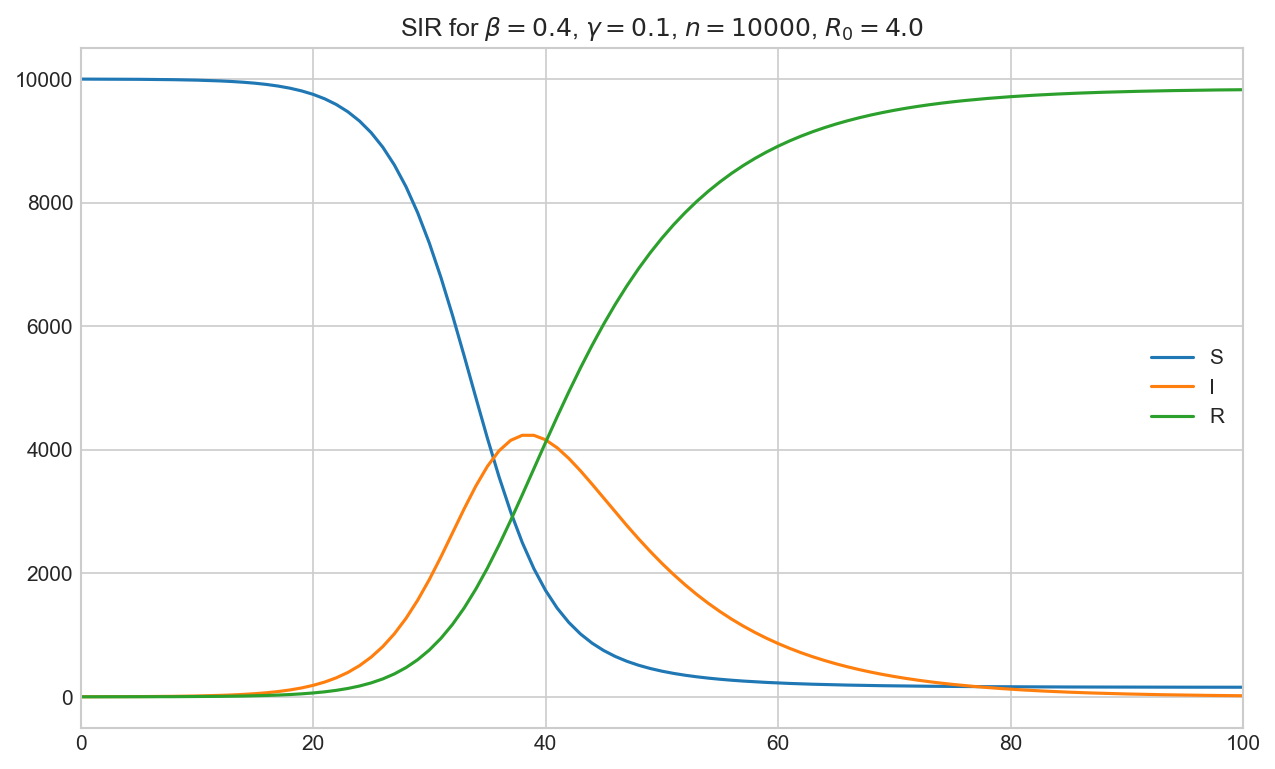

In [23]:
plot_sir(e1, beta1, gamma1, N)
plt.xlim([0, 100])
plt.show()

On the above plot we can see that there was an epidemic outburst.

In [24]:
beta2 = 0.8
gamma2 = 0.5

In [25]:
e2 = euler(X0, beta2, gamma2, N, 1000)

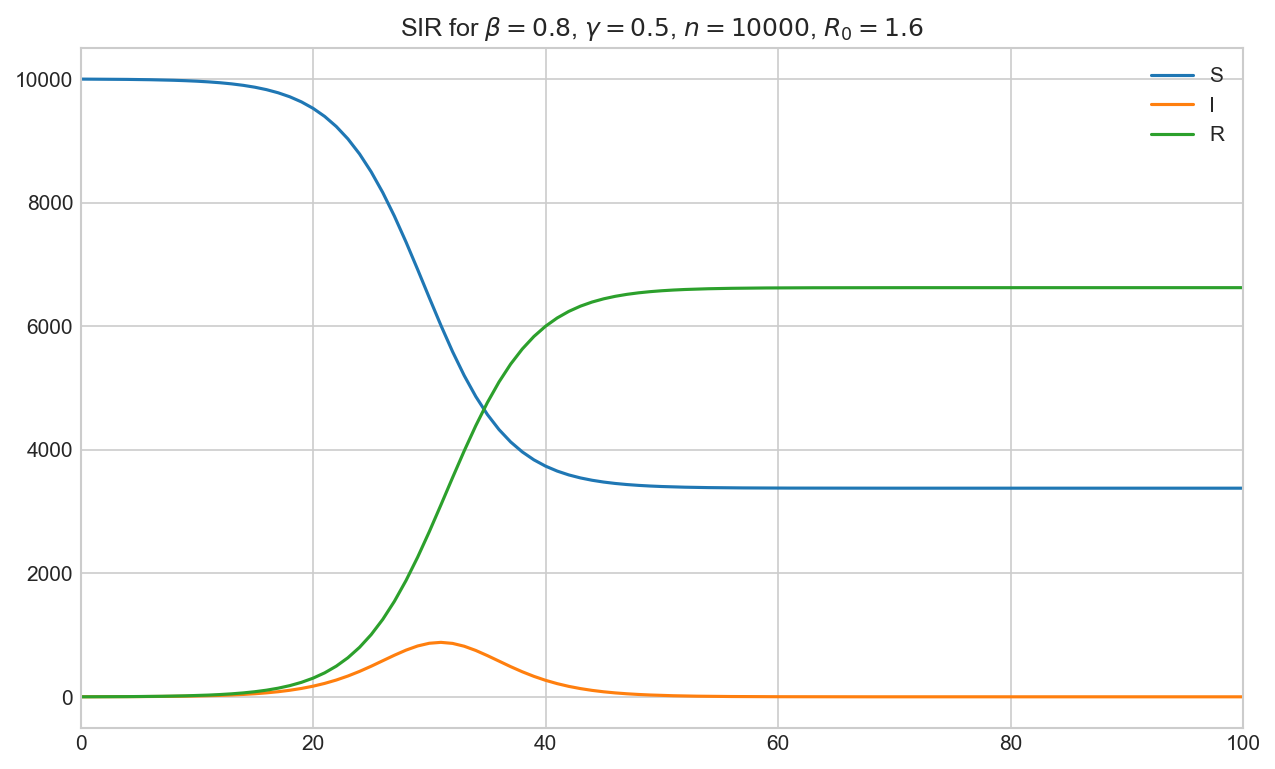

In [26]:
plot_sir(e2, beta2, gamma2, N)
plt.xlim([0, 100])
plt.show()

For this set of parameters, we also observe an epidemic outburs, but this time much smaller.

### $R_0 = \frac{\beta}{\gamma} < 1$

In [27]:
beta3 = 0.2
gamma3 = 0.4

In [28]:
e3 = euler(X0, beta3, gamma3, N, 1000)

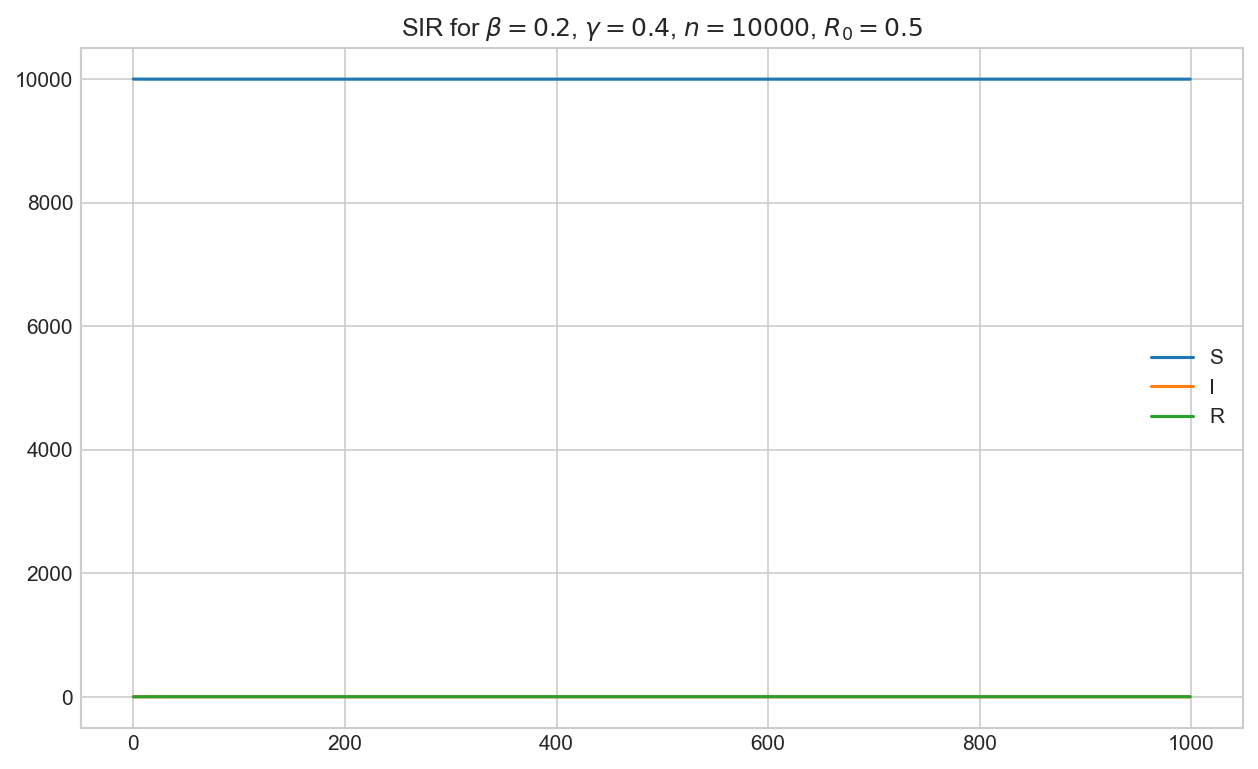

In [37]:
plot_sir(e3, beta3, gamma3, N)
plt.show()

We see now that as we put $\beta < \gamma$, we observe no epidemic outburst, even though we have $R_0 > 1$. To make sure that's the case, we plot the $I$ component separately.

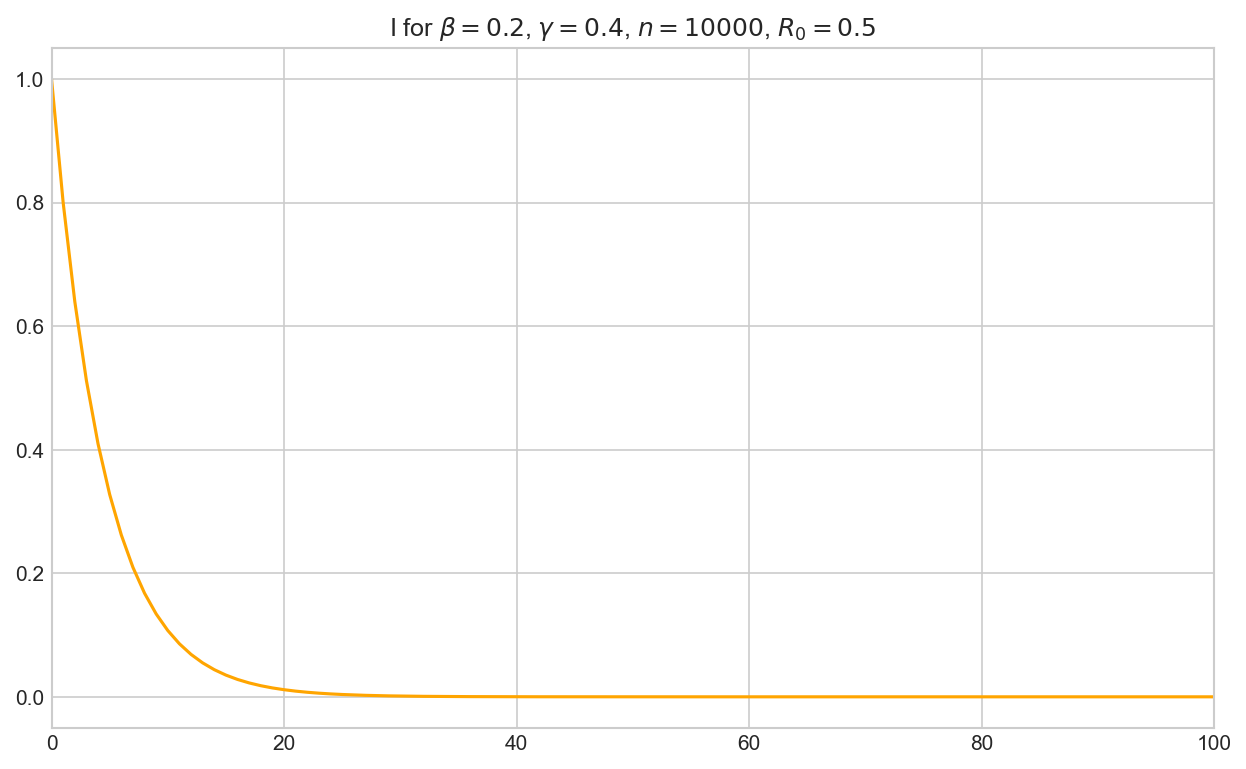

In [40]:
e3['I'].plot(title=fr'I for $\beta=0.2$, $\gamma=0.4$, $n=10000$, $R_0 = {beta3/gamma3}$', color='orange')
plt.xlim([0, 100])
plt.show()

We see that, in fact, an infected individual recovered, causing no further infections.

In [42]:
beta4 = 0.5
gamma4 = 0.8

In [43]:
e4 = euler(X0, beta4, gamma4, N, 1000)

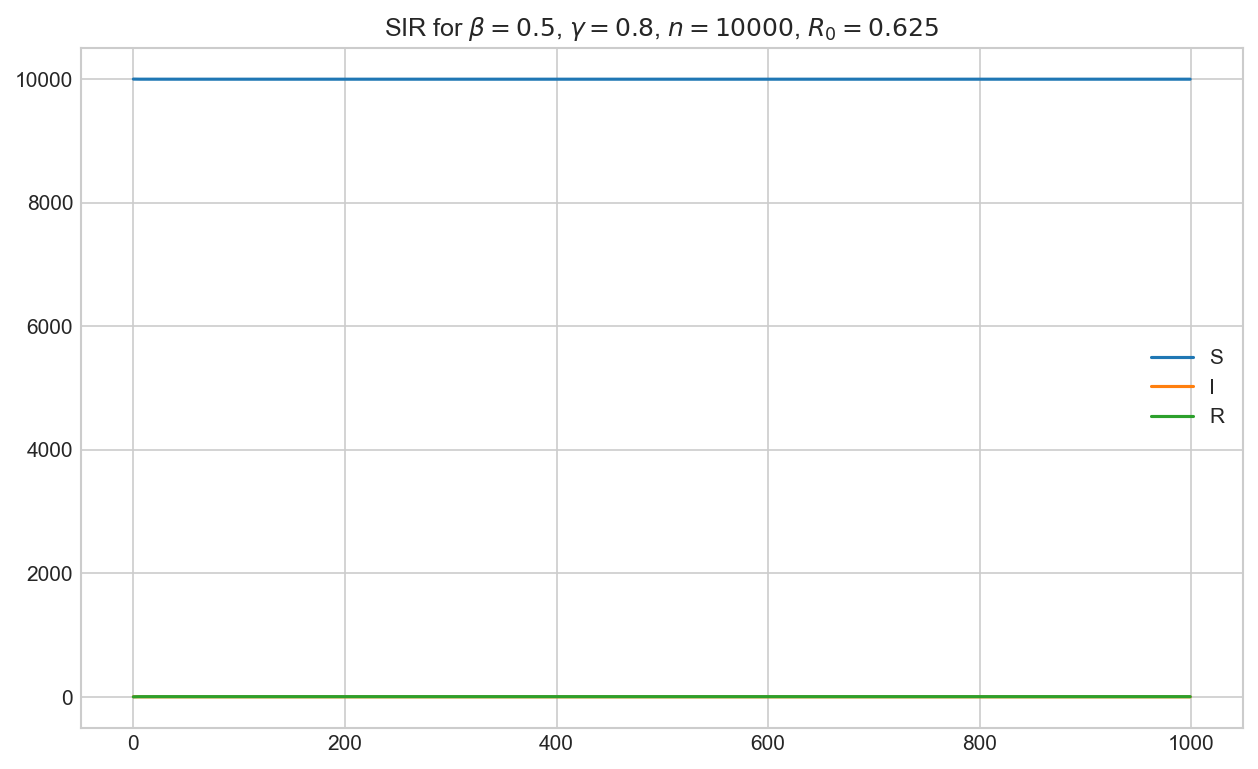

In [44]:
plot_sir(e4, beta4, gamma4, N)

Again, we don't observe an epidemic outbreak. We can look at I separately.

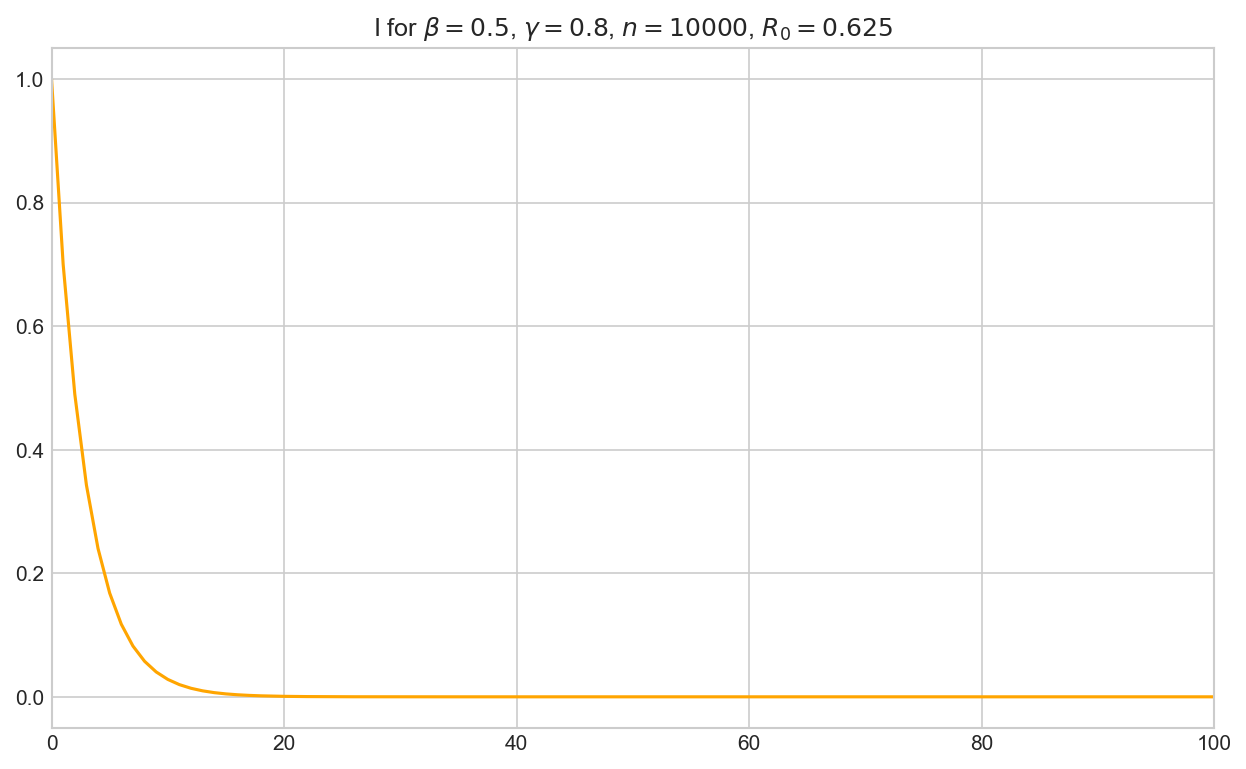

In [45]:
e4['I'].plot(title=fr'I for $\beta=0.5$, $\gamma=0.8$, $n=10000$, $R_0 = {beta4/gamma4}$', color='orange')
plt.xlim([0, 100])
plt.show()

Analogous situation to previous example.

In [50]:
def si(x, beta, gamma, n):
    """
    Single run of SI model.
    Args:
        x - s, i values vector,
        beta - infection rate,
        gamma - recovery rate,
        n - population size.
    """
    s, i = x
    ds = -beta*s*i / n
    di = beta*s*i / n - gamma*i
    
    return np.array([ds, di])

In [51]:
s0 = np.linspace(1, 100, 20)
i0 = np.linspace(1, 100, 20)
S, I = np.meshgrid(s0, i0)
u, v = np.zeros(S.shape), np.zeros(I.shape)
n1, n2 = S.shape

In [54]:
for j in range(n1):
    for k in range(n2):
        s = S[j, k]
        i = I[j, k]
        SI = si([s, i], beta1, gamma1, 101)
        u[j, k] = SI[0]
        v[j, k] = SI[1]

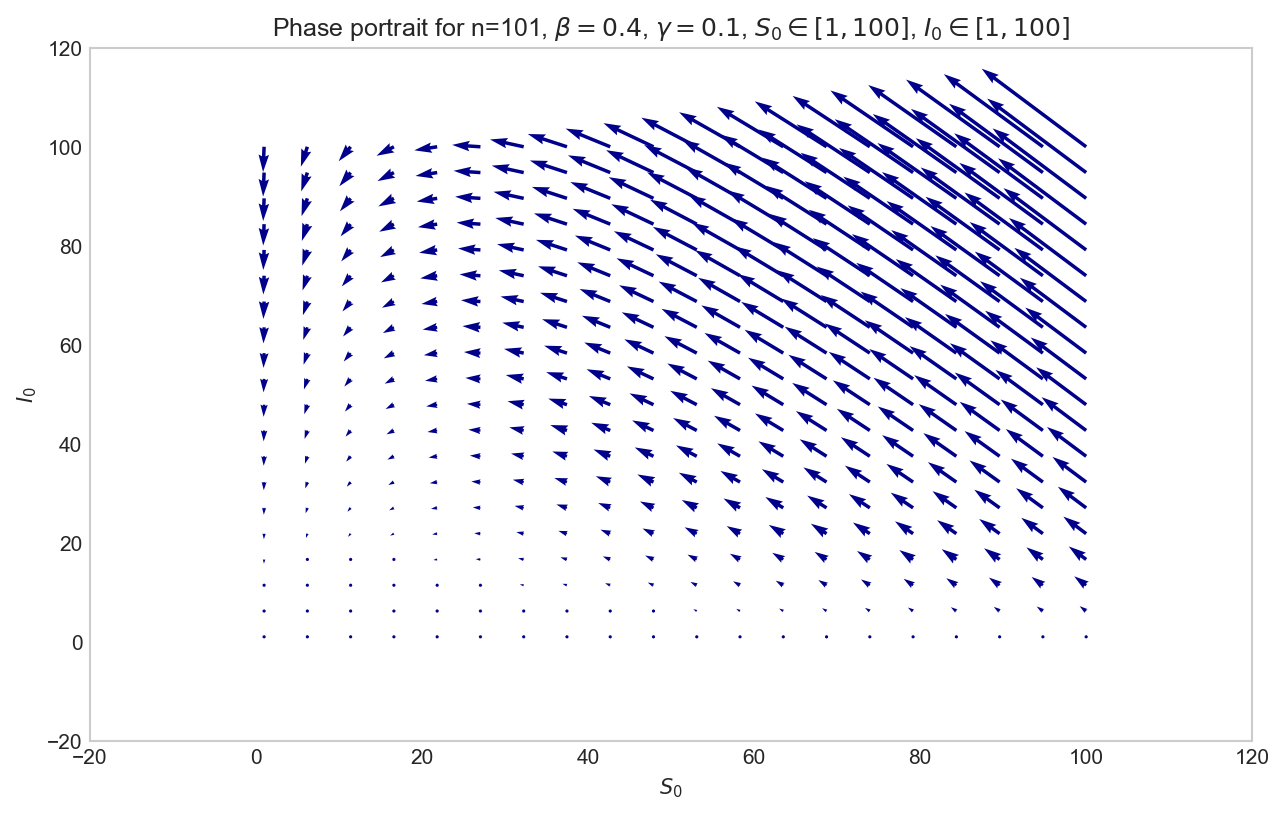

In [131]:
plt.quiver(S, I, u, v, color='darkblue')
plt.title(fr'Phase portrait for n=101, $\beta={beta1}$, $\gamma={gamma1}$, $S_0 \in [1, 100]$, $I_0 \in [1, 100]$')
plt.xlim([-20, 120])
plt.ylim([-20, 120])
plt.xlabel(r'$S_0$')
plt.ylabel(r'$I_0$')
plt.grid(False)
plt.show()

<ul>
    <li> Stable points for $I_0 = 0$, also when both $S_0$ and $I_0$ are small (0,20). 
    <li> As we reach big values for both $S_0$ (30,100) and $I_0$ (20,100), $S$ decreases and $I$ increases 
    <li> For $S_0$ around (10,30), same $I_0$, S continues to decrease and $I$ starts to decrease. 
    <li> For $S_0$ = 0, S remains stable and $I$ decreases.

In [111]:
def total_infections(x0, betas, gammas, n):
    
    assert len(betas) == len(gammas)
    
    M = len(betas)
    infections = np.zeros([M, 2])
    for i in range(M):
        R0 = betas[i] / gammas[i]
        sir_run = euler(x0, betas[i], gammas[i], n, 1000)
        infected = sir_run['R'][999]
        infections[i] = [R0, infected]
        
    infections = pd.DataFrame(infections)
    infections.columns = ['R0', 'Infected_total']
    
    return infections

In [126]:
Betas = np.arange(0.01, 1, 0.01)
Gammas = np.arange(0.99, 0.00, -0.01)

In [127]:
TI = total_infections(X0, Betas, Gammas, N)

In [128]:
TI = TI.sort_values('R0')

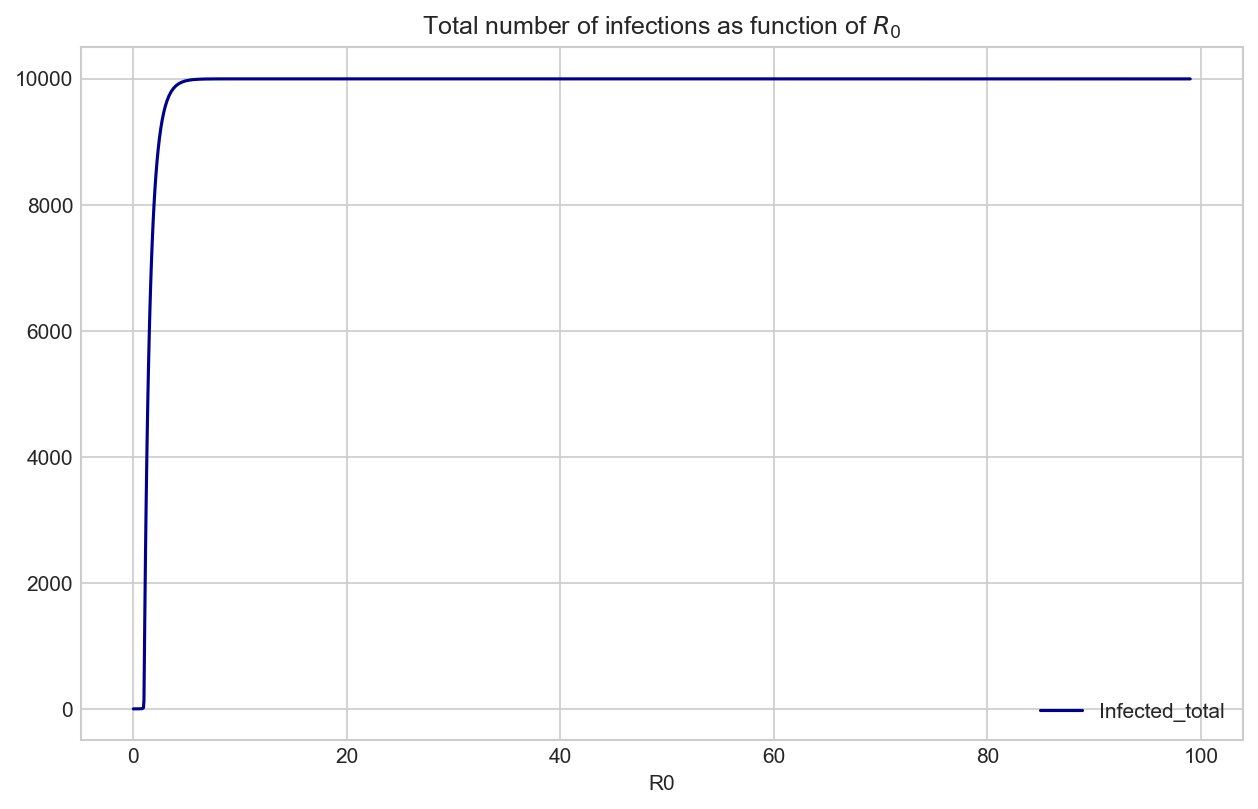

In [134]:
TI.plot(x='R0', y='Infected_total', color='darkblue')
plt.title('Total number of infections as function of $R_0$')
plt.show()